In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sbn
import sklearn

# Data cleaning #

In [46]:
df= pd.read_csv("airlines_delay.csv")

In [47]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


#### Check for null values ##

In [48]:
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

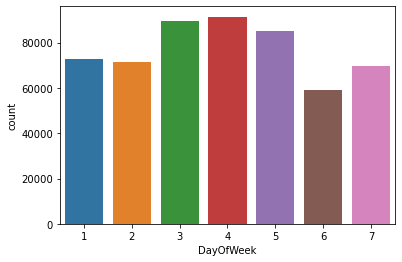

In [49]:
sbn.countplot(data=df,x="DayOfWeek")

array([<AxesSubplot:ylabel='Flight'>, <AxesSubplot:ylabel='Time'>,
       <AxesSubplot:ylabel='Length'>, <AxesSubplot:ylabel='DayOfWeek'>],
      dtype=object)

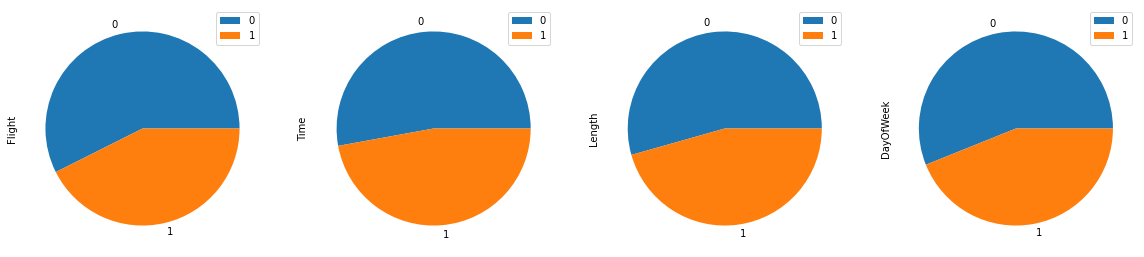

In [50]:
df.groupby(['Class']).sum().plot(kind='pie',subplots=True,figsize=(20,10))

In [51]:
z = df.groupby(['DayOfWeek','Class']).count().unstack('Class')['Time']

In [52]:
for i in range(z.shape[0]):
    FlightsNum = z.iloc[i,0]+z.iloc[i,1]
    for j in [0,1]:
        z.iloc[i,j] = z.iloc[i,j]/FlightsNum

In [53]:
FlightsNum

69879.0

### Delaying graphics per day

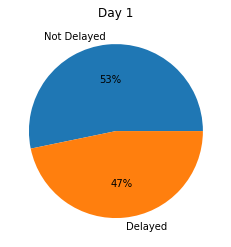

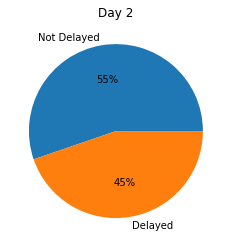

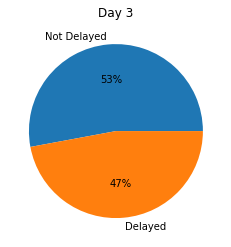

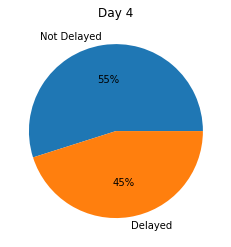

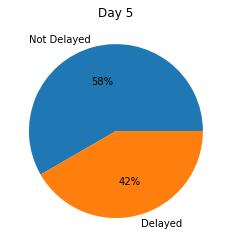

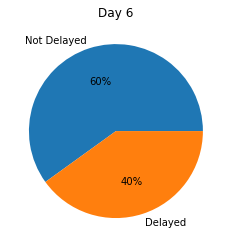

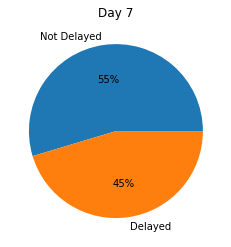

In [54]:
for i in range(1,8):
    j=z.iloc[i-1,:]
    Labels=["Not Delayed","Delayed"]
    plt.pie(j,labels=Labels, autopct='%.0f%%')
    plt.title('Day ' + str(i))
    plt.show()
    

### Delaying graphics each Airlines

In [36]:
a = df.groupby(['Airline','Class']).count().unstack('Class')['Time']

a

Class,0,1
Airline,,
0,12460,8226
1,27920,17736
2,7579,3892
3,9653,8459
4,9161,11957
5,33488,27452
6,16728,11255
7,3557,2899
8,14552,6275


In [55]:
a = df.groupby(['Airline','Class']).count().unstack('Class')['Time']

for i in range(a.shape[0]):
    numOfFlights = a.iloc[i,0]+a.iloc[i,1]
    for j in [0,1]:
        a.iloc[i,j] = a.iloc[i,j]/numOfFlights
a

Class,0,1
Airline,,
9E,0.602340,0.397660
AA,0.611530,0.388470
AS,0.660710,0.339290
B6,0.532962,0.467038
CO,0.433801,0.566199
DL,0.549524,0.450476
EV,0.597792,0.402208
F9,0.550960,0.449040
FL,0.698708,0.301292


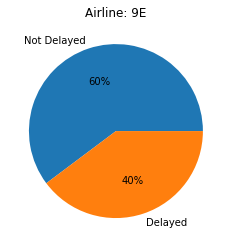

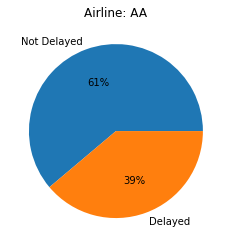

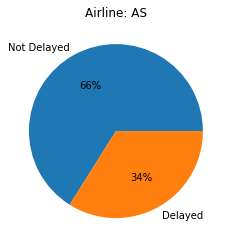

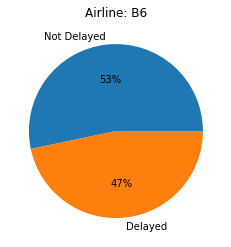

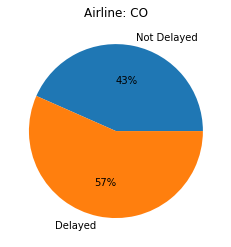

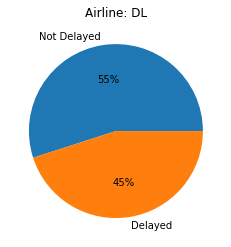

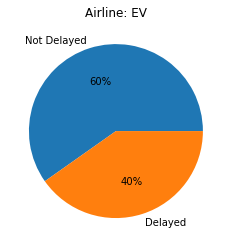

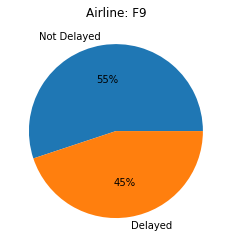

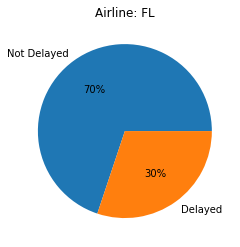

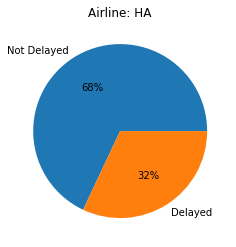

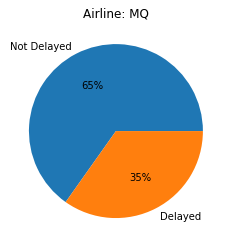

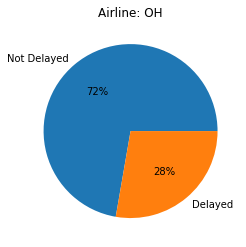

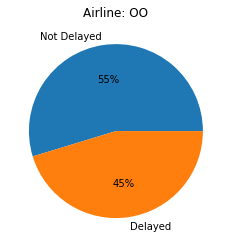

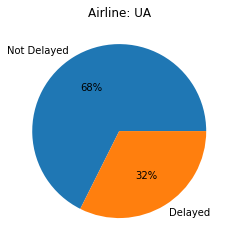

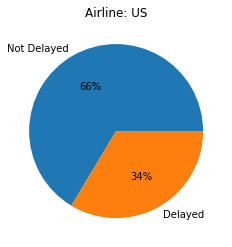

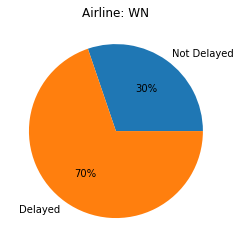

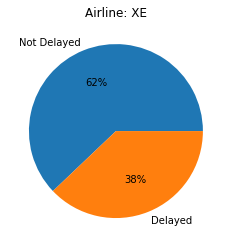

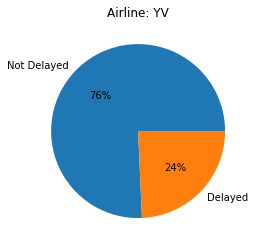

In [56]:

for i in range(a.shape[0]):
    f=a.iloc[i,:]
    r=a.iloc[0:,:0]
    Labels=["Not Delayed","Delayed"]
    plt.pie(f,labels=Labels,autopct='%.0f%%')
    plt.title("Airline: " + r.index[i])
    plt.show()

### Checking categorical values and applying label encoding

In [58]:
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df.iloc[:,3]=le.fit_transform(df.iloc[:,3])
df.iloc[:,4]=le.fit_transform(df.iloc[:,4])
df.iloc[:,5]=le.fit_transform(df.iloc[:,5])


In [60]:
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline          int32
AirportFrom      int32
AirportTo        int32
DayOfWeek        int64
Class            int64
dtype: object

In [61]:
df.corr()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,1.000000,-0.005750,-0.341481,0.095285,-0.021801,-0.022072,0.000416,-0.046174
Time,-0.005750,1.000000,-0.020610,0.004381,-0.031553,0.030602,0.001272,0.150457
Length,-0.341481,-0.020610,1.000000,-0.207061,0.049697,0.086980,0.013398,0.040488
Airline,0.095285,0.004381,-0.207061,1.000000,0.098237,0.098791,-0.007258,0.066936
AirportFrom,-0.021801,-0.031553,0.049697,0.098237,1.000000,0.015137,0.003732,0.018458
AirportTo,-0.022072,0.030602,0.086980,0.098791,0.015137,1.000000,0.003847,0.047988
DayOfWeek,0.000416,0.001272,0.013398,-0.007258,0.003732,0.003847,1.000000,-0.026198
Class,-0.046174,0.150457,0.040488,0.066936,0.018458,0.047988,-0.026198,1.000000


# Model creation

In [62]:
y= df["Class"].values
x=df.drop("Class",axis=1).values

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= scaler.fit_transform(x)

 # Random Forrest

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) # 75% training and 23% test

In [127]:
x_test= scaler.fit_transform(x_test)
x_train= scaler.fit_transform(x_train)

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
clf=RandomForestClassifier(n_estimators=100)

In [128]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [129]:
y_pred=clf.predict(x_test)

In [130]:
from sklearn import metrics

In [131]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6176304821796716


#### Accuary too low, I reduce the number of estimators and train again

In [73]:
clf=RandomForestClassifier(n_estimators=25)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6184610592824407


### Accuarcy too low again,I reduce the number of estimators, increase test and train again

In [97]:
df1=df
df1.drop(["AirportFrom","DayOfWeek"],axis=1)

,Flight,Time,Length,Airline,AirportTo,Class
0,2313.0,1296.0,141.0,5,129,0
1,6948.0,360.0,146.0,12,208,0
2,1247.0,1170.0,143.0,3,60,0
3,31.0,1410.0,344.0,14,217,0
4,563.0,692.0,98.0,8,16,0
...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,12,252,1
539378,1264.0,560.0,115.0,15,79,1
539379,5209.0,827.0,74.0,6,16,1
539380,607.0,715.0,65.0,15,43,1


In [100]:
clf1=RandomForestClassifier(n_estimators=100)


y1= df1["Class"].values
x1=df1.drop("Class",axis=1).values


x1= scaler.fit_transform(x1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3)
clf1.fit(x1_train,y1_train)
y1_pred=clf.predict(x1_test)

In [153]:
print('\033[1m'+ "Random Forrest Accuracy is: ",metrics.accuracy_score(y_test, y_pred))


Random Forrest Accuracy is:  0.5835471574981831


### Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=2)
logr.fit(x_train,y_train)

y_pred = logr.predict(x_test)
print('\033[1m'+ "Logistic Regression Accuracy:",metrics.accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.5835471574981831


In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[57089 17868]
 [38370 21519]]


### KNN Classifier

In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
print('\033[1m'+ "KNN Accuracy is :",metrics.accuracy_score(y_test, y_pred))

KNN Accuracy is : 0.6104000118653872


In [132]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[50119 24929]
 [26632 33166]]


## ANN (artificial neural network)

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [134]:
x_train.shape

(404536, 7)

In [135]:
model =Sequential()

model.add(Dense(12,activation="sigmoid"))
model.add(Dense(12,activation="sigmoid"))
model.add(Dense(12,activation="sigmoid"))
model.add(Dense(12,activation="sigmoid"))
model.add(Dense(12,activation="sigmoid"))
model.add(Dense(12,activation="sigmoid"))
model.add(Dense(12,activation="sigmoid"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [136]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=100)


Epoch 1/100
1619/1619 [==============================] - 2s 1ms/step - loss: 0.2469 - val_loss: 0.2407
Epoch 2/100
1619/1619 [==============================] - 2s 1ms/step - loss: 0.2393 - val_loss: 0.2386
Epoch 3/100
1619/1619 [==============================] - 2s 1ms/step - loss: 0.2384 - val_loss: 0.2396
Epoch 4/100
1619/1619 [==============================] - 2s 1ms/step - loss: 0.2383 - val_loss: 0.2381
Epoch 5/100
1619/1619 [==============================] - 2s 1ms/step - loss: 0.2382 - val_loss: 0.2379
Epoch 6/100
1619/1619 [==============================] - 2s 1ms/step - loss: 0.2382 - val_loss: 0.2379
Epoch 7/100
1619/1619 [==============================] - 2s 1ms/step - loss: 0.2383 - val_loss: 0.2385
Epoch 8/100
1619/1619 [==============================] - 2s 1ms/step - loss: 0.2382 - val_loss: 0.2381
Epoch 9/100
1619/1619 [==============================] - 2s 1ms/step - loss: 0.2382 - val_loss: 0.2379
Epoch 10/100
1619/1619 [==============================] - 2s 1ms/step - l

Epoch 80/100
1619/1619 [==============================] - 7s 4ms/step - loss: 0.2298 - val_loss: 0.2297
Epoch 81/100
1619/1619 [==============================] - 6s 3ms/step - loss: 0.2297 - val_loss: 0.2308
Epoch 82/100
1619/1619 [==============================] - 7s 4ms/step - loss: 0.2295 - val_loss: 0.2296
Epoch 83/100
1619/1619 [==============================] - 7s 4ms/step - loss: 0.2293 - val_loss: 0.2293
Epoch 84/100
1619/1619 [==============================] - 7s 4ms/step - loss: 0.2292 - val_loss: 0.2297
Epoch 85/100
1619/1619 [==============================] - 7s 4ms/step - loss: 0.2291 - val_loss: 0.2292
Epoch 86/100
1619/1619 [==============================] - 5s 3ms/step - loss: 0.2290 - val_loss: 0.2293
Epoch 87/100
1619/1619 [==============================] - 6s 4ms/step - loss: 0.2290 - val_loss: 0.2296
Epoch 88/100
1619/1619 [==============================] - 5s 3ms/step - loss: 0.2289 - val_loss: 0.2289
Epoch 89/100
1619/1619 [==============================] - 5s 3ms

In [143]:
y_pred = model.predict(x_test)

In [144]:
y_pred = (y_pred > 0.5)


In [139]:
print(y_pred)

[[0.441301 ]
 [0.5069789]
 [0.8133085]
 ...
 [0.2983913]
 [0.5268021]
 [0.3871466]]


In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
testAccuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]) * 100
print('\033[1m' +"Test Accuracy is " +str(testAccuracy))

Test Accuracy is 61.04000118653872


## I could not increase its Accuracy above 61%. KNN,RF and ANN worked with approximately 61% success